In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm, os
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import random

# Task 4: Time-delay embedding

### Part one

In [2]:
#Load dataset
dataset = np.loadtxt('takens_1.txt')

x = dataset[:,0]
y = dataset[:,1]
t = np.array(range(dataset.shape[0]))

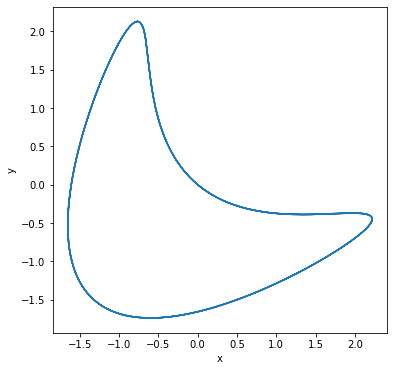

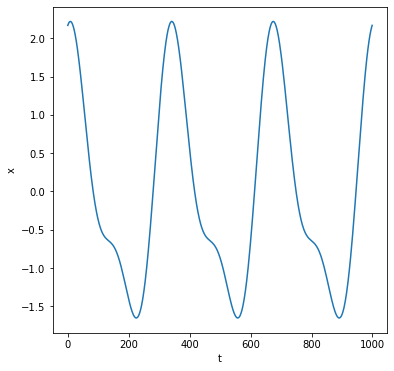

In [3]:
#Visualize dataset
plt.figure(figsize=(6,6))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show

#Plot first coordinate against time
plt.figure(figsize=(6,6))
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.show()

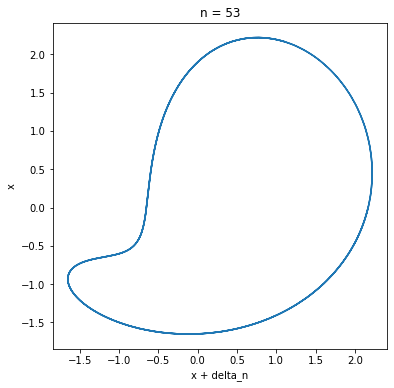

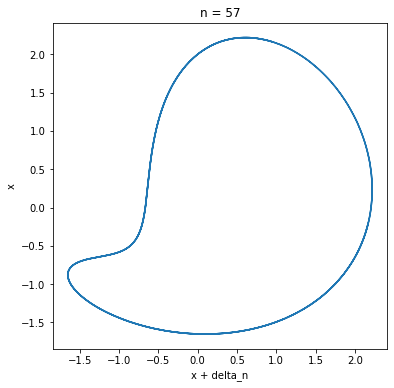

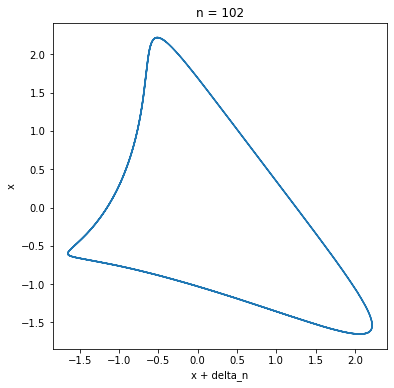

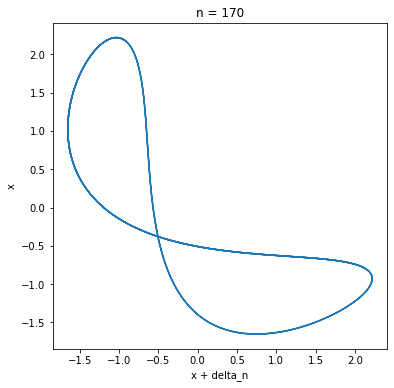

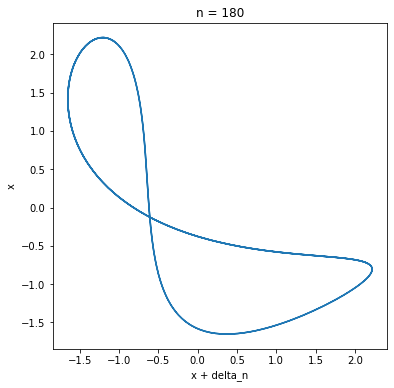

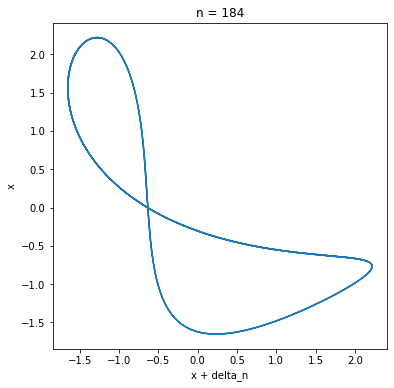

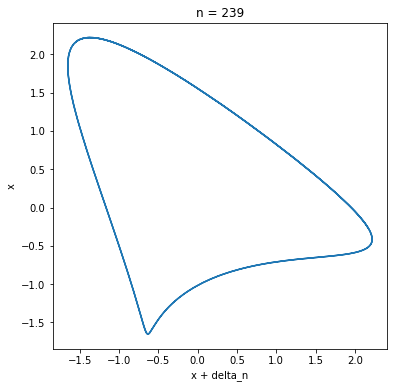

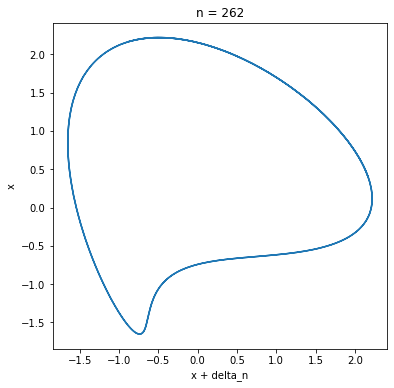

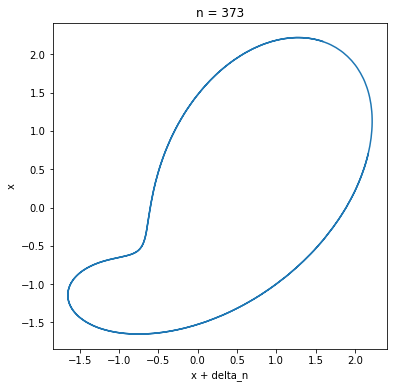

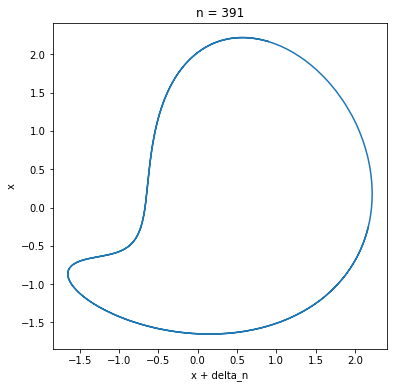

In [4]:
n = random.sample(range(1, 400), 10)
n.sort()

for e in n:
    x = dataset[:(dataset.shape[0] - e), 0]
    d = dataset[e:, 0]
    plt.figure(figsize=(6,6))
    plt.plot(d, x)
    plt.title('n = ' + str(e))
    plt.xlabel('x + delta_n')
    plt.ylabel('x')
    plt.show

### Part two

In [5]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [10, 10, 10]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

In [6]:
# define the lorenz system
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

In [7]:
# use odeint() to solve a system of ordinary differential equations
xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

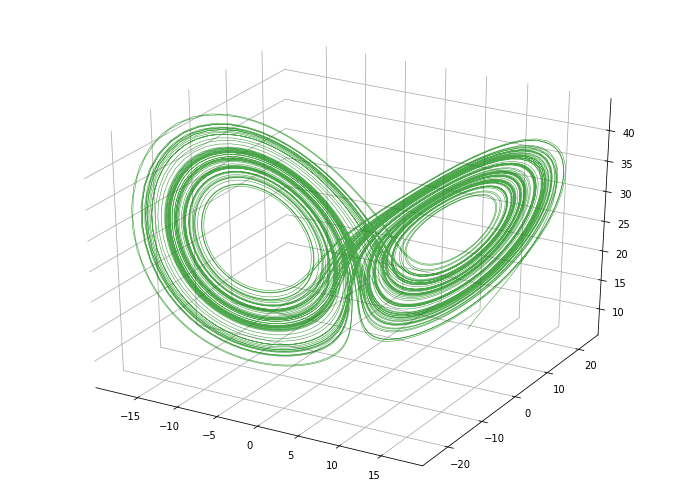

In [38]:
# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.6)

plt.show()

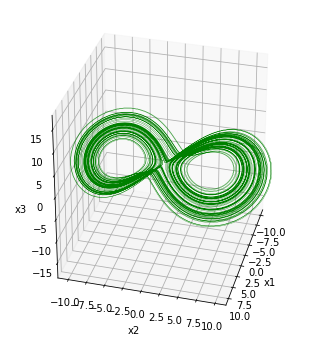

In [35]:
# time-delay
d_t = 6
x1 = x[range(0, x.shape[0] - 2*d_t)]
x2 = x[range(d_t, x.shape[0] - d_t)]
x3 = x[range(2*d_t, x.shape[0])]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(122, projection='3d')
ax.view_init(30, 15)
plt.ylim(-11, 11)
plt.xlim(-11, 11)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.plot(x1, x2, x3, color='g', linewidth=0.3)
plt.show()